# Plant Leaf Classification

Applying machine learning models for classification of plant leaf images

### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import os
import string
import random
from tqdm import tqdm

### Reading the dataset

In [2]:
dataset = pd.read_csv("Flavia_features.csv")

ds_path = 'C:/Users/vjosv/master/dataset/Leaves/'
img_files = [i for i in os.listdir(ds_path) if i!='.ipynb_checkpoints']

In [3]:
dataset.head(5)

,Unnamed: 0,area,perimeter,physiological_length,physiological_width,aspect_ratio,rectangularity,circularity,mean_r,mean_g,mean_b,stddev_r,stddev_g,stddev_b,contrast,correlation,inverse_difference_moments,entropy
0,0,485129.5,3822.131487,1459,905,1.612155,2.721737,30.112968,21.548321,38.921378,10.541783,41.316764,67.891852,26.448052,55.779676,0.992673,0.774745,4.046708
1,0,489890.0,3809.143686,1422,945,1.504762,2.743044,29.618028,11.758990,50.206020,2.000756,25.948078,84.915973,17.924460,12.757222,0.998075,0.810892,3.549434
2,0,307903.5,2569.731221,1114,394,2.827411,1.425499,21.446715,10.248443,19.695162,16.331825,45.721887,48.443413,60.486853,8.076081,0.999279,0.860258,2.823292
3,0,245870.5,2813.824586,1264,327,3.865443,1.681080,32.202354,14.705938,20.883349,13.306845,40.661030,52.649291,38.531062,4.589367,0.999007,0.899268,2.009211
4,0,69526.5,3704.076776,1448,964,1.502075,20.076834,197.337487,7.405359,9.433330,5.798306,34.457877,43.523617,30.145214,1.927087,0.997009,0.960461,0.865603


### Creating target labels

Breakpoints are used alongside the image file to create a vector of target labels. The breakpoints are specified in Flavia leaves dataset website.

In [4]:
breakpoints = [1001,1059,1060,1122,1552,1616,1123,1194,1195,1267,1268,1323,1324,1385,1386,1437,1497,1551,1438,1496,2001,2050,2051,2113,2114,2165,2166,2230,2231,2290,2291,2346,2347,2423,2424,2485,2486,2546,2547,2612,2616,2675,3001,3055,3056,3110,3111,3175,3176,3229,3230,3281,3282,3334,3335,3389,3390,3446,3447,3510,3511,3563,3566,3621]

In [5]:
target_list = []
for file in img_files:
    target_num = int(file.split(".")[0])
    flag = 0
    i = 0 
    for i in range(0,len(breakpoints),2):
        if((target_num >= breakpoints[i]) and (target_num <= breakpoints[i+1])):
            flag = 1
            break
    if(flag==1):
        target = int((i/2))
        target_list.append(target)

In [6]:
y = np.array(target_list)
target_list.count(9)

59

In [7]:
X = dataset.iloc[:,1:]

In [8]:
X.head(5)



,area,perimeter,physiological_length,physiological_width,aspect_ratio,rectangularity,circularity,mean_r,mean_g,mean_b,stddev_r,stddev_g,stddev_b,contrast,correlation,inverse_difference_moments,entropy
0,485129.5,3822.131487,1459,905,1.612155,2.721737,30.112968,21.548321,38.921378,10.541783,41.316764,67.891852,26.448052,55.779676,0.992673,0.774745,4.046708
1,489890.0,3809.143686,1422,945,1.504762,2.743044,29.618028,11.758990,50.206020,2.000756,25.948078,84.915973,17.924460,12.757222,0.998075,0.810892,3.549434
2,307903.5,2569.731221,1114,394,2.827411,1.425499,21.446715,10.248443,19.695162,16.331825,45.721887,48.443413,60.486853,8.076081,0.999279,0.860258,2.823292
3,245870.5,2813.824586,1264,327,3.865443,1.681080,32.202354,14.705938,20.883349,13.306845,40.661030,52.649291,38.531062,4.589367,0.999007,0.899268,2.009211
4,69526.5,3704.076776,1448,964,1.502075,20.076834,197.337487,7.405359,9.433330,5.798306,34.457877,43.523617,30.145214,1.927087,0.997009,0.960461,0.865603


In [11]:
X = dataset[['area','perimeter','physiological_length','physiological_width','aspect_ratio','rectangularity','circularity','mean_r','mean_g','mean_b','stddev_r','stddev_g','stddev_b','contrast','correlation','inverse_difference_moments','entropy']]
X
# y = dataset['target_val'].to_list()
y = target_list

### 

In [12]:
X

,area,perimeter,physiological_length,physiological_width,aspect_ratio,rectangularity,circularity,mean_r,mean_g,mean_b,stddev_r,stddev_g,stddev_b,contrast,correlation,inverse_difference_moments,entropy
0,485129.5,3822.131487,1459,905,1.612155,2.721737,30.112968,21.548321,38.921378,10.541783,41.316764,67.891852,26.448052,55.779676,0.992673,0.774745,4.046708
1,489890.0,3809.143686,1422,945,1.504762,2.743044,29.618028,11.758990,50.206020,2.000756,25.948078,84.915973,17.924460,12.757222,0.998075,0.810892,3.549434
2,307903.5,2569.731221,1114,394,2.827411,1.425499,21.446715,10.248443,19.695162,16.331825,45.721887,48.443413,60.486853,8.076081,0.999279,0.860258,2.823292
3,245870.5,2813.824586,1264,327,3.865443,1.681080,32.202354,14.705938,20.883349,13.306845,40.661030,52.649291,38.531062,4.589367,0.999007,0.899268,2.009211
4,69526.5,3704.076776,1448,964,1.502075,20.076834,197.337487,7.405359,9.433330,5.798306,34.457877,43.523617,30.145214,1.927087,0.997009,0.960461,0.865603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1902,461140.0,6378.520442,1274,1101,1.157130,3.041753,88.228137,23.783565,36.293105,21.694625,45.075537,64.668263,41.827096,28.238168,0.995964,0.795875,3.599582
1903,637829.5,4121.739572,1191,1055,1.128910,1.969970,26.635233,28.881916,46.498822,23.016589,44.130072,65.783191,37.395361,26.604019,0.997254,0.716242,4.674605
1904,371950.5,3847.376212,1460,967,1.509824,3.795720,39.796435,18.641599,34.809681,9.775415,40.488711,69.770100,26.659364,21.478996,0.995827,0.825369,3.049712
1905,764912.5,4271.960790,1141,1014,1.125247,1.512557,23.858479,34.912162,54.138055,26.549748,45.961112,66.759222,37.250674,23.082022,0.997802,0.678819,5.431301


[0, 0, 0, 0, 0]

### Train test split

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 142)

In [65]:
X_train.head(5)

,area,perimeter,physiological_length,physiological_width,aspect_ratio,rectangularity,circularity,mean_r,mean_g,mean_b,stddev_r,stddev_g,stddev_b,contrast,correlation,inverse_difference_moments,entropy
16624,30990.0,744.960459,224,195,1.148718,1.409487,17.907909,72.228157,98.503966,83.345444,80.954492,67.943096,74.479993,52.633662,0.994979,0.419160,9.461925
12218,22140.0,842.592927,224,224,1.000000,2.266305,32.066976,161.817841,162.396345,171.824677,97.702268,91.892747,91.322192,183.997490,0.987628,0.496398,9.201823
16074,3892.0,391.730010,145,105,1.380952,3.911871,39.427647,106.912588,111.113939,99.777204,25.027663,20.004611,18.954565,7.118415,0.992252,0.545871,7.045677
22440,17132.5,685.865005,184,175,1.051429,1.879469,27.457219,160.655154,175.509467,167.645408,61.979414,44.256657,44.157761,61.156079,0.987557,0.674050,7.034068
19859,4124.0,468.735062,91,177,0.514124,3.905674,53.276566,9.857302,9.940450,9.456354,46.898880,47.095626,45.881841,189.229567,0.619262,0.953958,0.806179


In [66]:
y_train[0:5]

[38, 61, 34, 13, 77]

### Feature Scaling

In [67]:
from sklearn.preprocessing import StandardScaler

In [68]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [69]:
X_train[0:2]

array([[ 1.56532907,  0.88915512,  1.22353567,  0.76233094,  0.22338492,
        -0.53413351, -0.58189854, -0.81821785, -0.56979099, -0.70149364,
         0.84978827,  0.85627972,  1.07597432, -0.23057264,  0.41229881,
        -1.33119308,  1.1102157 ],
       [ 0.70969693,  1.29845925,  1.22353567,  1.24436992, -0.01688861,
         0.81536665,  0.63405673,  0.48427357,  0.34228285,  0.57254869,
         1.55504805,  2.02646161,  1.86523312,  0.0778203 ,  0.304584  ,
        -0.91188689,  1.01824712]])

In [70]:
y_train[0:2]

[38, 61]

### Applying SVM classifier model

In [71]:
from sklearn import svm

In [72]:
clf = svm.SVC()
clf.fit(X_train,y_train)

SVC()

In [73]:
y_pred = clf.predict(X_test)

In [74]:
from sklearn import metrics

In [75]:
metrics.accuracy_score(y_test, y_pred)

0.49581939799331104

In [76]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.77      0.66        74
           1       0.85      0.94      0.89        31
           3       0.97      0.87      0.92        39
          10       0.15      0.18      0.16        34
          12       0.82      0.24      0.38        37
          13       0.51      0.70      0.59        40
          20       0.00      0.00      0.00        14
          30       0.32      0.88      0.47        77
          31       1.00      0.04      0.08        25
          34       0.93      1.00      0.97        14
          36       0.73      0.63      0.68        35
          38       0.49      0.33      0.40        51
          42       0.54      0.17      0.25        42
          46       0.24      0.11      0.15        44
          52       0.17      0.03      0.05        37
          53       0.24      0.55      0.34        74
          55       0.52      0.39      0.44        36
          61       0.78    

### Performing parameter tuning of the model

In [77]:
from sklearn.model_selection import GridSearchCV

In [78]:
parameters = [{'kernel': ['rbf'],
               'gamma': [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5],
               'C': [1, 10, 100, 1000]},
              {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}
             ]

In [79]:
svm_clf = GridSearchCV(svm.SVC(decision_function_shape='ovr'), parameters, cv=5)
svm_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.5],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}])

In [80]:
svm_clf.best_params_

{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}

In [81]:
means = svm_clf.cv_results_['mean_test_score']
stds = svm_clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, svm_clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

0.067 (+/-0.002) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.177 (+/-0.012) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.312 (+/-0.037) for {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.527 (+/-0.032) for {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.596 (+/-0.013) for {'C': 1, 'gamma': 0.2, 'kernel': 'rbf'}
0.670 (+/-0.029) for {'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}
0.180 (+/-0.014) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.312 (+/-0.043) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.501 (+/-0.035) for {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.732 (+/-0.032) for {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.763 (+/-0.019) for {'C': 10, 'gamma': 0.2, 'kernel': 'rbf'}
0.771 (+/-0.029) for {'C': 10, 'gamma': 0.5, 'kernel': 'rbf'}
0.312 (+/-0.042) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.470 (+/-0.035) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.688 (+/-0.027) for {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
0.798 (+/-0.024) for {'C': 100, 'gamma': 0.1, 'kernel':

In [82]:
y_pred_svm = svm_clf.predict(X_test)

In [83]:
metrics.accuracy_score(y_test, y_pred_svm)

0.81438127090301

In [91]:
metrics.precision_recall_fscore_support(y_test,y_pred_svm, beta=1,average='weighted')

(0.8156269230152196, 0.81438127090301, 0.8127883027541245, None)

In [86]:
2*0.8156269230152196*0.81438127090301/(0.8156269230152196+0.81438127090301)

0.8150036209954998

In [84]:
print(metrics.classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82        74
           1       1.00      0.97      0.98        31
           3       0.97      0.95      0.96        39
          10       0.77      0.71      0.74        34
          12       0.76      0.84      0.79        37
          13       0.88      0.95      0.92        40
          20       0.62      0.71      0.67        14
          30       0.82      0.86      0.84        77
          31       0.86      0.72      0.78        25
          34       0.93      1.00      0.97        14
          36       0.92      0.97      0.94        35
          38       0.78      0.84      0.81        51
          42       0.66      0.69      0.67        42
          46       0.67      0.66      0.67        44
          52       0.82      0.76      0.79        37
          53       0.77      0.82      0.80        74
          55       0.66      0.81      0.73        36
          61       0.96    

### Dimensionality Reduction using PCA

In [252]:
from sklearn.decomposition import PCA

In [253]:
pca = PCA()

In [254]:
pca.fit(X)

PCA()

In [255]:
var= pca.explained_variance_ratio_
var

array([5.51713754e-01, 3.74377493e-01, 7.39056869e-02, 2.46856436e-06,
       3.36911010e-07, 1.49189711e-07, 7.80386244e-08, 2.32681198e-08,
       5.21339465e-09, 3.39989879e-09, 9.84495856e-10, 3.22005279e-10,
       7.87465703e-11, 4.00954613e-11, 4.99957845e-12, 8.65174931e-13,
       5.30068736e-13, 2.11938332e-13, 1.23723191e-15, 3.79048781e-18])

In [256]:
import matplotlib.pyplot as plt
%matplotlib inline

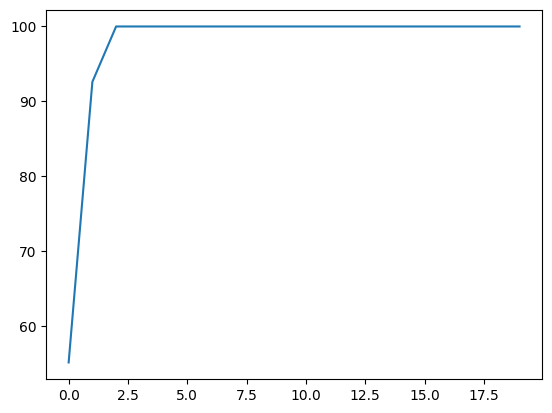

In [257]:
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
plt.plot(var1)

### Testing with mobile captured leaves which are not classified

In [41]:
import os
import cv2

In [42]:
def bg_sub(filename):
    test_img_path = '..\\mobile captures\\' + filename
    main_img = cv2.imread(test_img_path)
    img = cv2.cvtColor(main_img, cv2.COLOR_BGR2RGB)
    resized_image = cv2.resize(img, (1600, 1200))
    size_y,size_x,_ = img.shape
    gs = cv2.cvtColor(resized_image,cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gs, (55,55),0)
    ret_otsu,im_bw_otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    kernel = np.ones((50,50),np.uint8)
    closing = cv2.morphologyEx(im_bw_otsu, cv2.MORPH_CLOSE, kernel)
    
    ret_image, contours, hierarchy = cv2.findContours(closing,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    
    contains = []
    y_ri,x_ri, _ = resized_image.shape
    for cc in contours:
        yn = cv2.pointPolygonTest(cc,(x_ri//2,y_ri//2),False)
        contains.append(yn)

    val = [contains.index(temp) for temp in contains if temp>0]
    index = val[0]
    
    black_img = np.empty([1200,1600,3],dtype=np.uint8)
    black_img.fill(0)
    
    cnt = contours[index]
    mask = cv2.drawContours(black_img, [cnt] , 0, (255,255,255), -1)
    
    maskedImg = cv2.bitwise_and(resized_image, mask)
    white_pix = [255,255,255]
    black_pix = [0,0,0]
    
    final_img = maskedImg
    h,w,channels = final_img.shape
    for x in range(0,w):
        for y in range(0,h):
            channels_xy = final_img[y,x]
            if all(channels_xy == black_pix):
                final_img[y,x] = white_pix
    
    return final_img

In [45]:
filename = '1000.jpg' 
bg_rem_img = bg_sub(filename)

[ WARN:0@40.403] global loadsave.cpp:248 findDecoder imread_('..\mobile captures\1000.jpg'): can't open/read file: check file path/integrity


error: OpenCV(4.8.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


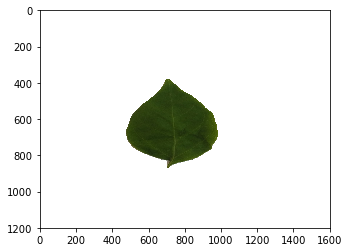

In [43]:
plt.imshow(bg_rem_img)

In [44]:
import mahotas as mt

In [45]:
def feature_extract(img):
    names = ['area','perimeter','pysiological_length','pysiological_width','aspect_ratio','rectangularity','circularity', \
             'mean_r','mean_g','mean_b','stddev_r','stddev_g','stddev_b', \
             'contrast','correlation','inverse_difference_moments','entropy'
            ]
    df = pd.DataFrame([], columns=names)

    #Preprocessing
    gs = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gs, (25,25),0)
    ret_otsu,im_bw_otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    kernel = np.ones((50,50),np.uint8)
    closing = cv2.morphologyEx(im_bw_otsu, cv2.MORPH_CLOSE, kernel)

    #Shape features
    image, contours, _ = cv2.findContours(closing,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    cnt = contours[0]
    M = cv2.moments(cnt)
    area = cv2.contourArea(cnt)
    perimeter = cv2.arcLength(cnt,True)
    x,y,w,h = cv2.boundingRect(cnt)
    aspect_ratio = float(w)/h
    rectangularity = w*h/area
    circularity = ((perimeter)**2)/area

    #Color features
    red_channel = img[:,:,0]
    green_channel = img[:,:,1]
    blue_channel = img[:,:,2]
    blue_channel[blue_channel == 255] = 0
    green_channel[green_channel == 255] = 0
    red_channel[red_channel == 255] = 0

    red_mean = np.mean(red_channel)
    green_mean = np.mean(green_channel)
    blue_mean = np.mean(blue_channel)

    red_std = np.std(red_channel)
    green_std = np.std(green_channel)
    blue_std = np.std(blue_channel)

    #Texture features
    textures = mt.features.haralick(gs)
    ht_mean = textures.mean(axis=0)
    contrast = ht_mean[1]
    correlation = ht_mean[2]
    inverse_diff_moments = ht_mean[4]
    entropy = ht_mean[8]

    vector = [area,perimeter,w,h,aspect_ratio,rectangularity,circularity,\
              red_mean,green_mean,blue_mean,red_std,green_std,blue_std,\
              contrast,correlation,inverse_diff_moments,entropy
             ]

    df_temp = pd.DataFrame([vector],columns=names)
    df = df.append(df_temp)
    
    return df

In [46]:
features_of_img = feature_extract(bg_rem_img)
features_of_img

,area,perimeter,pysiological_length,pysiological_width,aspect_ratio,rectangularity,circularity,mean_r,mean_g,mean_b,stddev_r,stddev_g,stddev_b,contrast,correlation,inverse_difference_moments,entropy
0,153912.5,1581.907845,507,486,1.04321,1.600923,16.258799,3.72212,5.285164,1.348841,13.059666,18.114367,5.464123,14.528435,0.99761,0.951879,1.088378


In [47]:
scaled_features = sc_X.transform(features_of_img)
print(scaled_features)
# y_pred_mobile = svm_clf.predict(features_of_img)
y_pred_mobile = svm_clf.predict(scaled_features)
y_pred_mobile[0]

18

In [48]:
common_names = ['pubescent bamboo','Chinese horse chestnut','Anhui Barberry', \
                'Chinese redbud','true indigo','Japanese maple','Nanmu',' castor aralia', \
                'Chinese cinnamon','goldenrain tree','Big-fruited Holly','Japanese cheesewood', \
                'wintersweet','camphortree','Japan Arrowwood','sweet osmanthus','deodar','ginkgo, maidenhair tree', \
                'Crape myrtle, Crepe myrtle','oleander','yew plum pine','Japanese Flowering Cherry','Glossy Privet',\
                'Chinese Toon','peach','Ford Woodlotus','trident maple','Beales barberry','southern magnolia',\
                'Canadian poplar','Chinese tulip tree','tangerine'
               ]
common_names[y_pred_mobile[0]]

'Crape myrtle, Crepe myrtle'

In [12]:
print(y)

[24 24  2 ... 23 30 13]


In [15]:
list(y).count(y)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [17]:
ly =list(y)

In [18]:
ly.count()

TypeError: count() takes exactly one argument (0 given)

In [19]:
pd.Series(ly).value_counts()

16    77
4     73
3     72
19    66
2     65
23    65
13    65
29    64
1     63
11    63
6     62
17    62
18    61
20    60
14    60
0     59
9     59
28    57
15    56
31    56
5     56
22    55
8     55
21    55
27    55
24    54
26    53
30    53
7     52
12    52
25    52
10    50
Name: count, dtype: int64